In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
#Loading and Reading the data
filepath='D:\houses_to_rent.csv'
houses=pd.read_csv(filepath,encoding='unicode_escape')
houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,SÃ£o Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,SÃ£o Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,SÃ£o Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
#Exporing the data
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [5]:
houses.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [11]:
#change spaces for underscores
cols = houses.columns
cols = cols.map(lambda x: x.replace(' ','_') if isinstance(x, (str)) else x)
houses.columns = cols
#change the categorical variables
houses.animal.replace(['acept','not acept'],[1,0], inplace = True)
houses.furniture.replace(['furnished','not furnished'],[1,0], inplace = True)
#change "$" for use queries
houses.rename(columns={'hoa_(R$)' : 'hoa',
'rent_amount_(R$)' : 'rent_amount',
'property_tax_(R$)' : 'property_tax',
'fire_insurance_(R$)' : 'fire_insurance',
'total_(R$)' : 'total'}, inplace = True)

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

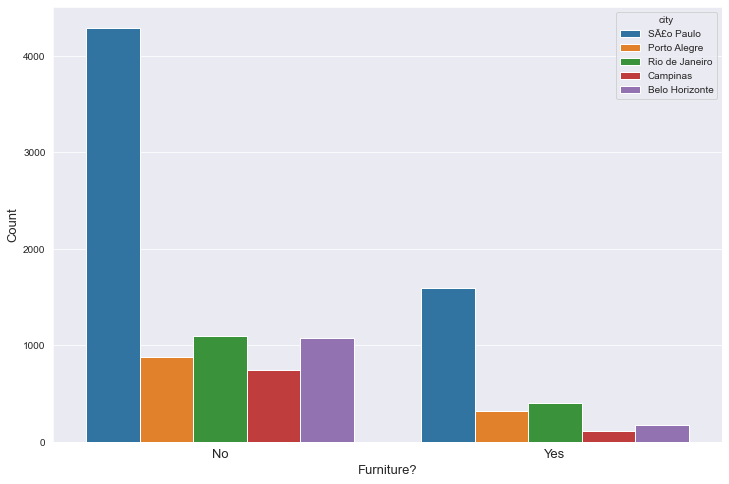

In [12]:
ax = sns.countplot(houses['furniture'], hue = houses['city'])
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Furniture?', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.set_xticklabels(['No','Yes'], fontsize=13)

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

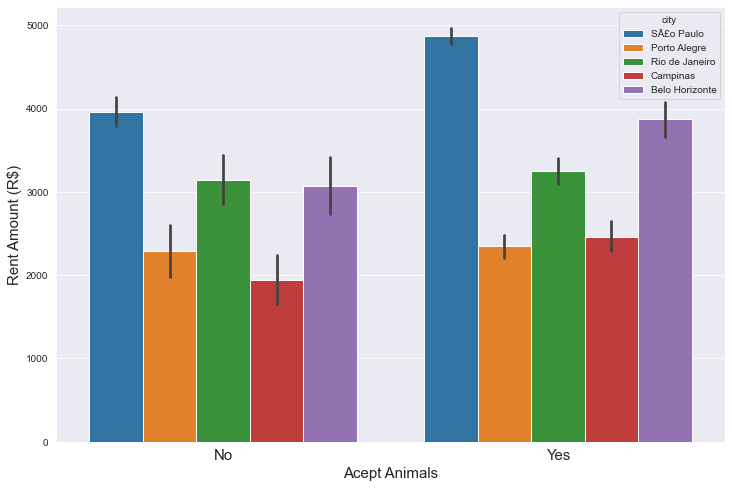

In [15]:
ax = sns.barplot(x ='animal', y ='rent_amount',
data = houses, hue ='city')
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Acept Animals', fontsize=15)
ax.set_ylabel('Rent Amount (R$)', fontsize=15)
ax.set_xticklabels(['No','Yes'], fontsize=15)

Text(0, 0.5, 'Size of Area')

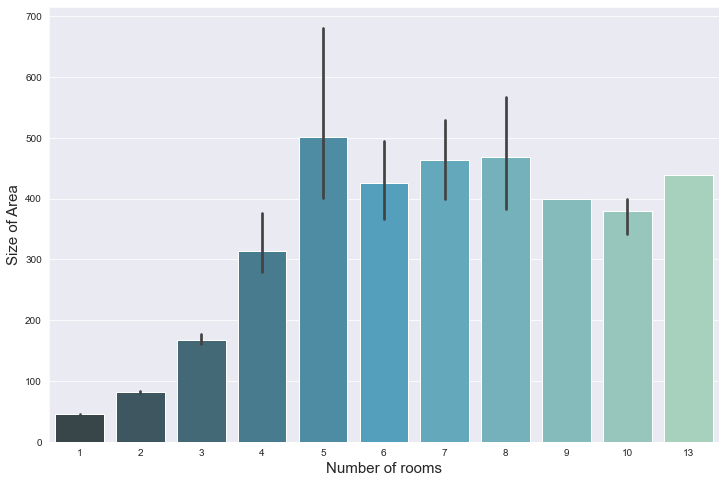

In [16]:
ax = sns.barplot(x='rooms', y='area', data = houses, 
palette = 'GnBu_d')
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Number of rooms', fontsize=15)
ax.set_ylabel('Size of Area', fontsize=15)

Text(0, 0.5, 'Homeowners association tax (R$)')

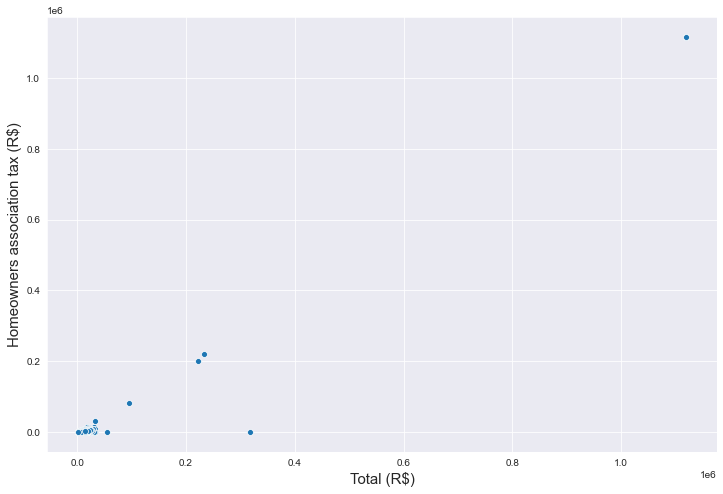

In [17]:
ax = sns.scatterplot(x = 'total', y = 'hoa', data = houses)
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Total (R$)', fontsize=15)
ax.set_ylabel('Homeowners association tax (R$)', fontsize=15)

Text(0, 0.5, 'Homeowners association tax (R$)')

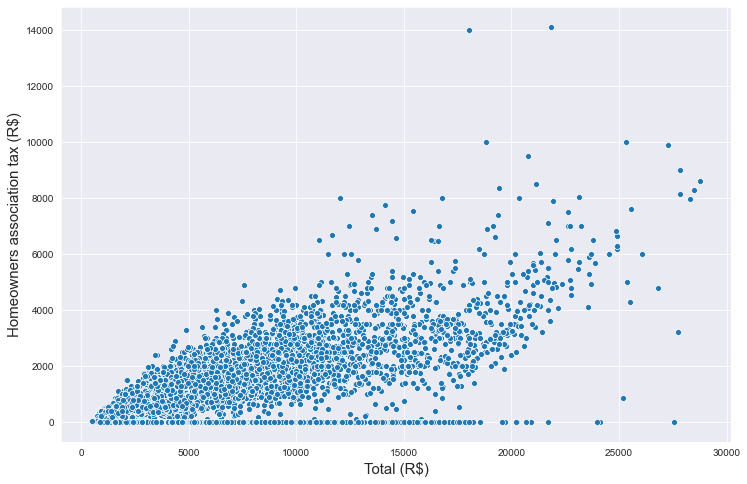

In [18]:
houses = houses.drop(labels=houses[(houses['hoa'] > 300000)].index)
houses = houses.drop(labels=houses[(houses['total'] > 30000)].index)
ax = sns.scatterplot(x = 'total', y = 'hoa', data = houses)
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Total (R$)', fontsize=15)
ax.set_ylabel('Homeowners association tax (R$)', fontsize=15)

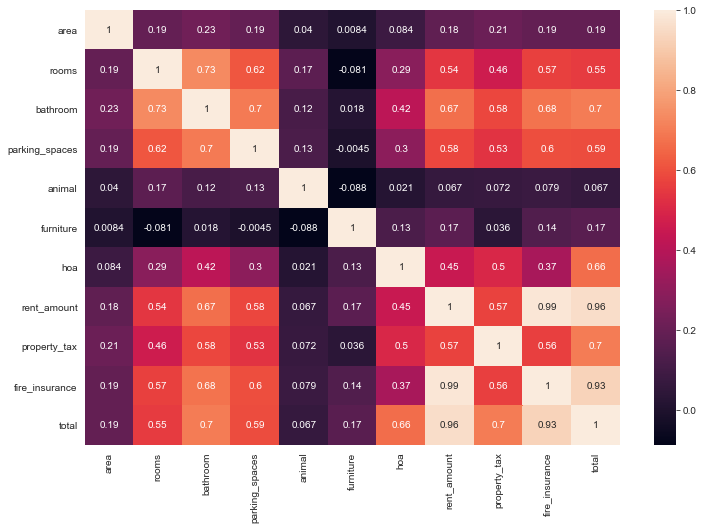

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(houses.corr(), annot=True)

Text(0.5, 1.1, 'Scatter plots between variables')

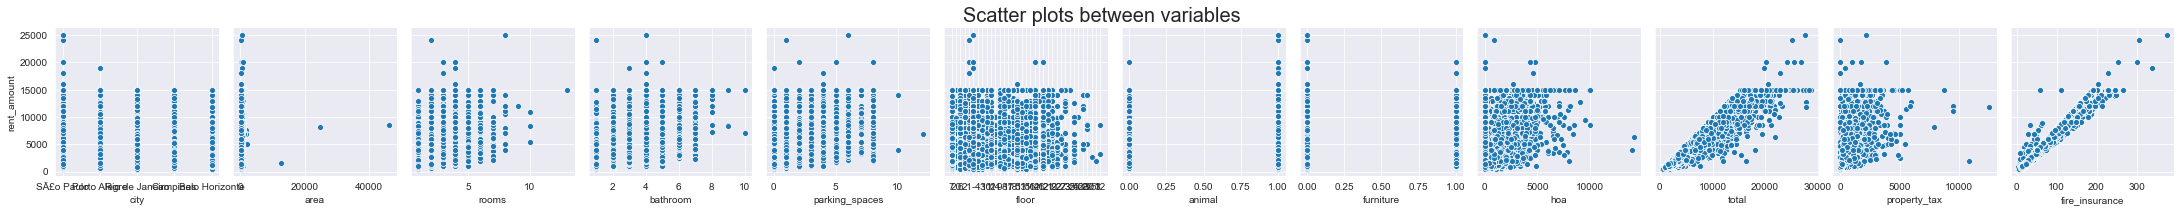

In [20]:
ax = sns.pairplot(houses, y_vars='rent_amount', x_vars=['city', 'area', 'rooms', 'bathroom', 'parking_spaces', 'floor', 'animal', 'furniture', 'hoa', 'total', 'property_tax', 'fire_insurance'])
ax.fig.suptitle('Scatter plots between variables', fontsize=20, y=1.1)

In [24]:
metrics = [] #list with RMSE values
y = houses['rent_amount'] #Creating a Series for target variable
#Creating a DF for explanatory variables
x = houses.drop(['rent_amount','city','parking_spaces','area',
'bathroom','furniture','animal','floor','rooms', 'total'], axis = 1)
#Splitting data arrays into two subset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 8)
reg = LinearRegression() #Instantiating the model 
reg.fit(x_train, y_train) #Training data
predict = reg.predict(x_test) 
#add a constant and looking the summary
x_train_constant = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_constant, hascont = True).fit()
print(model_sm.summary())
#looking the metrics
print('MAE: ', mean_absolute_error(y_test, predict).round(3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)).round(3))
print('R2:', r2_score(y_test, predict).round(3))
metrics.append(np.sqrt(mean_squared_error(y_test, predict)))

                            OLS Regression Results                            
Dep. Variable:            rent_amount   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.615e+05
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:22:52   Log-Likelihood:                -55698.
No. Observations:                7475   AIC:                         1.114e+05
Df Residuals:                    7471   BIC:                         1.114e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -23.9498      7.662     -3.

In [ ]:
new_houses = houses.copy()
features = ['floor','bathroom','rooms','area','parking_spaces',
'hoa', 'rent_amount', 'property_tax', 'fire_insurance']
for item in features:
    new_houses[item] = np.log1p(new_houses[item])

In [32]:
new_houses = pd.get_dummies(new_houses)
new_houses.head()

,area,rooms,bathroom,parking_spaces,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,...,floor_32,floor_35,floor_4,floor_46,floor_5,floor_51,floor_6,floor_7,floor_8,floor_9
0,70,2,1,1,1,1,2065,3300,211,42,...,0,0,0,0,0,0,0,1,0,0
1,320,4,4,0,1,0,1200,4960,1750,63,...,0,0,0,0,0,0,0,0,0,0
2,80,1,1,1,1,0,1000,2800,0,41,...,0,0,0,0,0,0,1,0,0,0
3,51,2,1,0,1,0,270,1112,22,17,...,0,0,0,0,0,0,0,0,0,0
4,25,1,1,0,0,0,0,800,25,11,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.1, 'Scatter plots between Log variables')

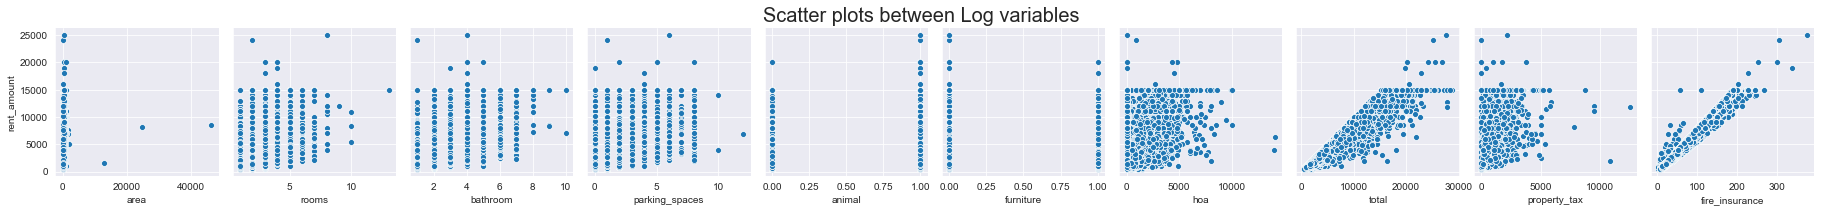

In [34]:
ax = sns.pairplot(new_houses, y_vars='rent_amount',
x_vars = ['area', 'rooms', 'bathroom', 'parking_spaces', 'animal', 'furniture', 'hoa', 'total', 'property_tax', 'fire_insurance'])
ax.fig.suptitle('Scatter plots between Log variables',
fontsize=20, y=1.1)

In [35]:
y = new_houses['rent_amount']
x = new_houses.drop(['rent_amount','animal','rooms','total','area'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 8)
reg = LinearRegression()
reg.fit(x_train, y_train)
predict = reg.predict(x_test)
x_train_constant = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_constant, hascont = True).fit()
print(model_sm.summary())
print('MAE: ', mean_absolute_error(y_test, predict).round(3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)).round(3))
print('R2:', r2_score(y_test, predict).round(3))
metrics.append(np.sqrt(mean_squared_error(y_test, predict)))

                            OLS Regression Results                            
Dep. Variable:            rent_amount   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.724e+04
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:28:25   Log-Likelihood:                -54286.
No. Observations:                7475   AIC:                         1.087e+05
Df Residuals:                    7433   BIC:                         1.089e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 115.1887    

C:\Users\Basil\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Basil\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [38]:
group = houses.groupby('city')['rent_amount']
Q1 = group.quantile(.25)
Q3 = group.quantile(.75)
IIQ = Q3 - Q1
down_limit = Q1 - 1.5* IIQ
up_limit = Q3 + 1.5* IIQ

In [39]:
new_df = pd.DataFrame() #Creating a empty df
for city in group.groups.keys():
    cities = houses['city'] == city #selecting boolean values 
    limits = (houses['rent_amount'] >= down_limit[city]) &                                                           (houses['rent_amount'] <= up_limit[city]) #put the boxplot limits
    queries = cities & limits #query cities and limits
    selected = houses[queries] #put the query above in houses
new_df = pd.concat([new_df, selected]) #concatenating the empty df in the df who I processed

Text(0, 0.5, 'Rent Amount (R$)')

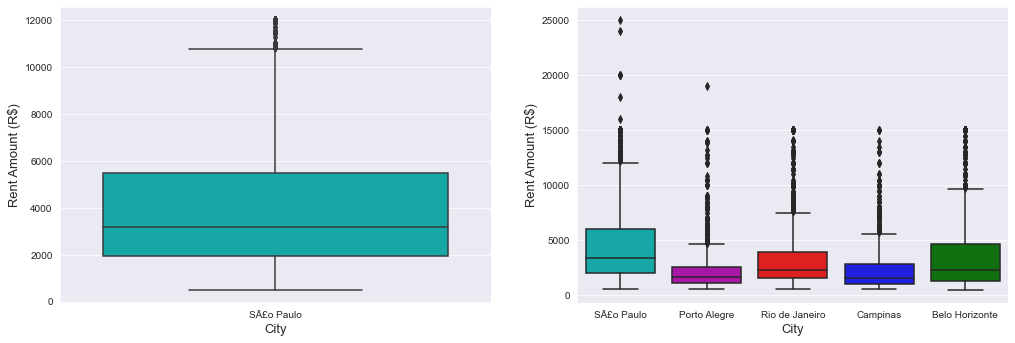

In [41]:
plt.figure(figsize=(17,12))
color = {'Belo Horizonte':'g', 'Campinas':'b', 'Porto Alegre':'m',
'Rio de Janeiro':'r', 'SÃ£o Paulo':'c'}
plt.subplot(2, 2, 1)
ax = sns.boxplot(x = 'city', y = 'rent_amount', data = new_df, palette = color)
ax.set_xlabel('City', fontsize=13)
ax.set_ylabel('Rent Amount (R$)', fontsize=13)
plt.subplot(2, 2, 2)
ax = sns.boxplot(x = 'city', y = 'rent_amount', data = houses, palette = color)
ax.set_xlabel('City', fontsize=13)
ax.set_ylabel('Rent Amount (R$)', fontsize=13)

In [ ]:
features = ['floor','bathroom','rooms','parking_spaces',
'hoa', 'rent_amount', 'property_tax', 'fire_insurance']
for item in features:
     new_df[item] = np.log1p(new_df[item])

In [ ]:
y = new_df['rent_amount']
x = new_df.drop(['rent_amount','city','rooms','area','total'],
axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 8)

In [42]:
reg = LinearRegression()
reg.fit(x_train, y_train)
predict = reg.predict(x_test)
x_train_constant = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_constant, hascont = True).fit()
print(model_sm.summary())
print('MAE: ', mean_absolute_error(y_test, predict).round(3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)).round(3))
print('R2:', r2_score(y_test, predict).round(3))
metrics.append(np.sqrt(mean_squared_error(y_test, predict)))

                            OLS Regression Results                            
Dep. Variable:            rent_amount   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.724e+04
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:34:54   Log-Likelihood:                -54286.
No. Observations:                7475   AIC:                         1.087e+05
Df Residuals:                    7433   BIC:                         1.089e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 115.1887    

C:\Users\Basil\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Basil\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0.5, 0, 'Residuals')

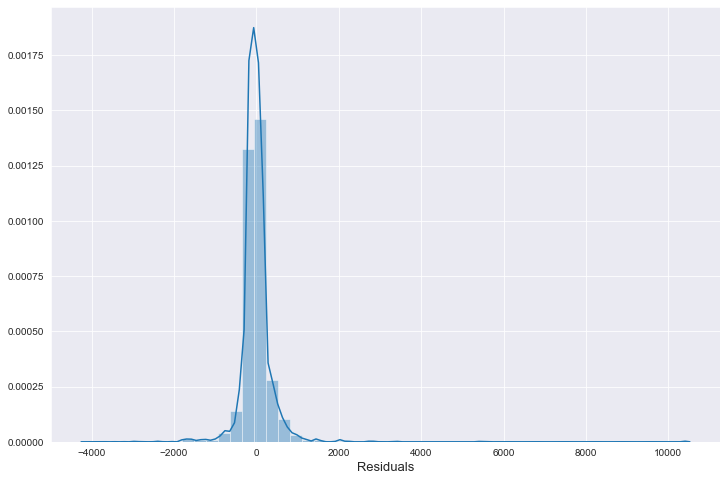

In [43]:
resid = y_test - predict
ax = sns.distplot(resid)
ax.figure.set_size_inches(12,8)
ax.set_xlabel('Residuals', fontsize=13)

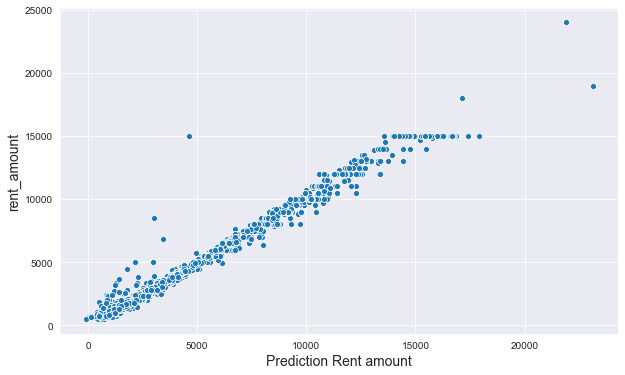

In [44]:
plt.figure(figsize=(10,6))
plt.xlabel('Prediction Rent amount', fontsize = 14)
plt.ylabel('rent_amount', fontsize = 14)
sns.scatterplot(predict, y_test)

In [45]:
attempts = ['first','second','third','fourth']
for attempt, metric in zip(attempts, metrics):
    print(attempt, ':', metric)

first : 459.7260506804912
second : 399.0113689750958
third : 399.0113689750958
